# This Notebook serves as a place to improve visuals and prevent memory errors

In [3]:
# Import Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

In [4]:
# Set Path

path = r'C:\Users\Josh Wattay\anaconda3\Instacart Basket Analysis'

In [5]:
# Import Data

small_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_sample_data_set.pkl'))

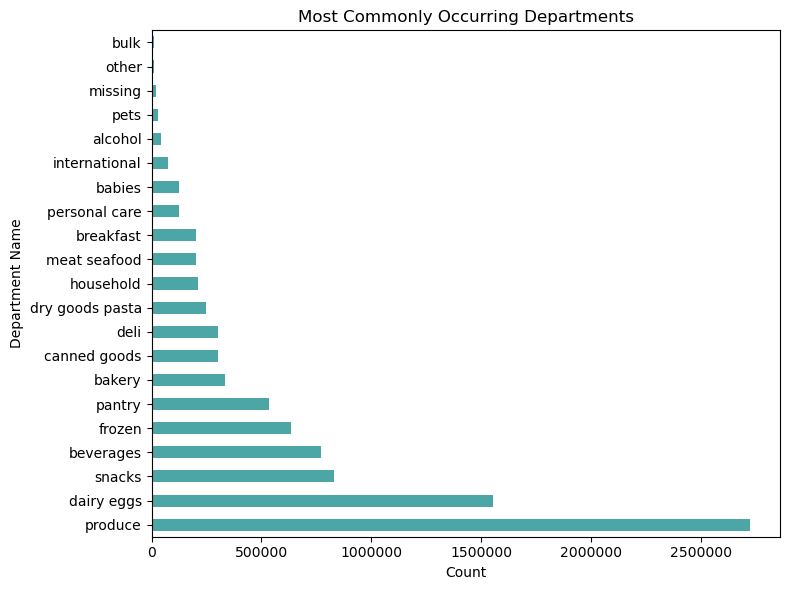

In [4]:
# Group by department_name and count occurrences
department_counts = small_final['department_name'].value_counts()

# Sort the values in descending order
department_counts = department_counts.sort_values(ascending=False)

# Plotting
best_depts_barh = plt.figure(figsize=(8, 6))  # Adjust size as needed
department_counts.plot(kind='barh', color='teal', alpha=0.7)

# Customizing the plot
plt.title('Most Commonly Occurring Departments')
plt.xlabel('Count')
plt.ylabel('Department Name')
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation on x-axis
plt.tight_layout()  # Ensure tight layout for better appearance

# Show the plot
plt.show()

In [5]:
# Save Bar Chart

best_depts_barh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'best_depts_barh.png'))

AttributeError: This method only works with the ScalarFormatter

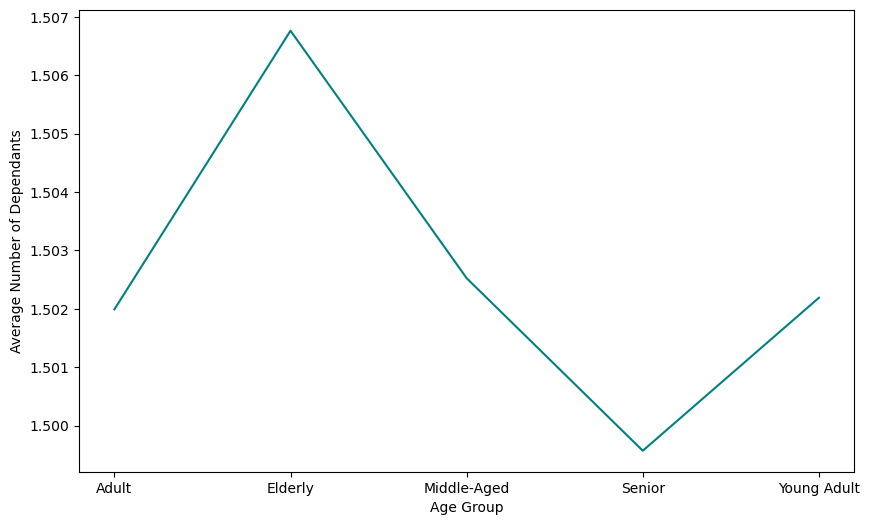

In [6]:
# First, calculate the average of n_dependants for each age_group
avg_n_dependants = small_final.groupby('age_group')['n_dependants'].mean()

# Plotting
line_age_groups_dependants_ = plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(avg_n_dependants, color='teal')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Dependants')
plt.ticklabel_format(style='plain', axis='both')  # Disable scientific notation
plt.tight_layout()  # Tight layout to prevent cutoff
plt.title('Average Number of Dependants by Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)  # Add grid if desired
plt.show()

In [7]:
# Save Line Chart

line_age_groups_dependants_.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_groups_dependants.png'))

In [6]:
age_group_counts = small_final['age_group'].value_counts()

age_group_counts.to_clipboard()

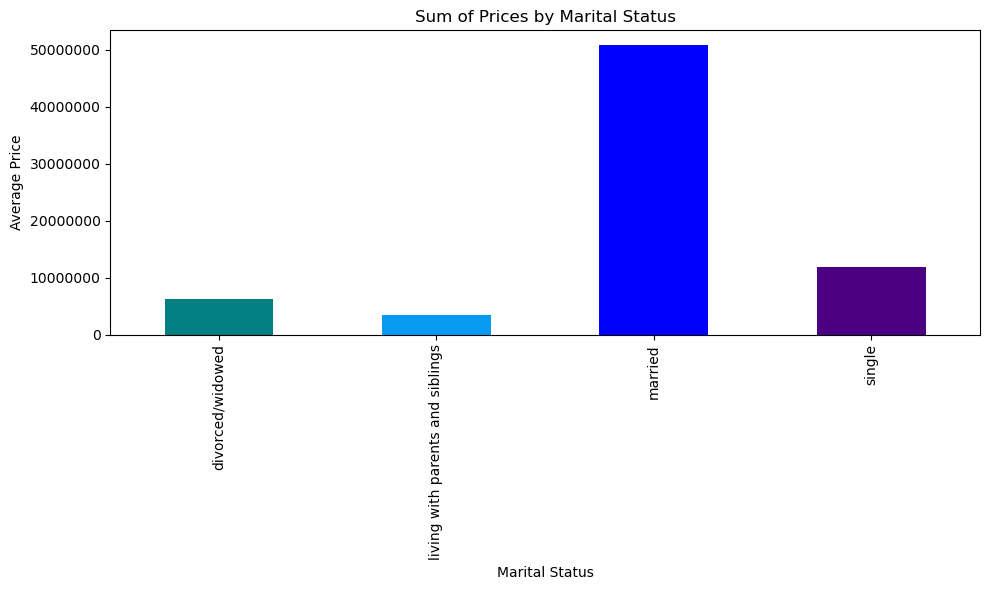

In [12]:
# Group by 'marital_status' and calculate the mean prices
grouped_df = small_final.groupby('marital_status')['prices'].sum()

# Define custom colors
colors = ['teal', '#069AF3', 'blue', 'indigo']

# Plotting
bar_marital_prices = grouped_df.plot(kind='bar', color=colors, figsize=(10, 6))

# Title and labels
plt.title('Sum of Prices by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Price')

# Turn off scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Save Bar Chart

bar_marital_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_prices.png'))

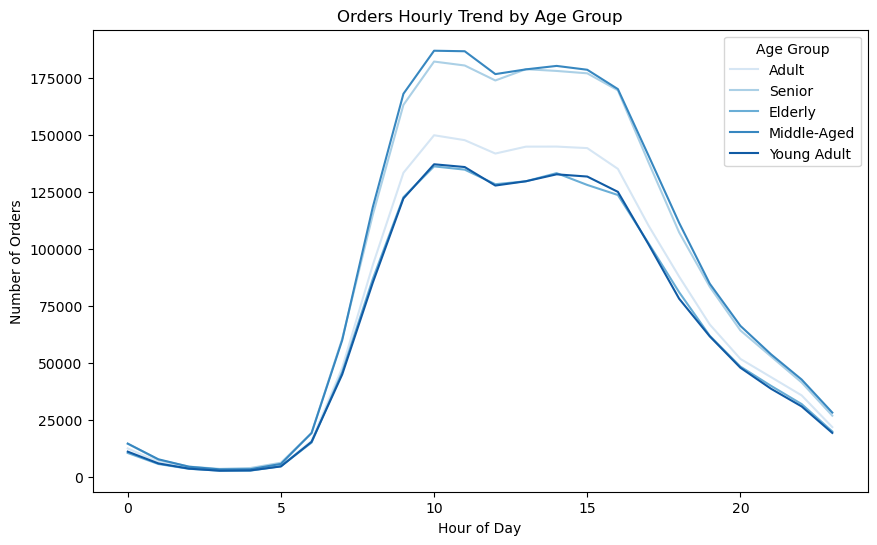

In [15]:
# Define custom color palette
blue_palette = sns.color_palette("Blues", n_colors=5)

# Plotting
line_age_hour_order= plt.figure(figsize=(10, 6))

for i, age_group in enumerate(small_final['age_group'].unique()):
    age_group_data = small_final[small_final['age_group'] == age_group]
    plt.plot(age_group_data.groupby('orders_time_of_day')['order_number'].count(), 
             label=age_group, 
             color=blue_palette[i])

# Title and labels
plt.title('Orders Hourly Trend by Age Group')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')

# Turn off scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(title='Age Group')

# Show the plot
plt.show()

In [16]:
# Save Line Chart

line_age_hour_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_hour_order.png'))

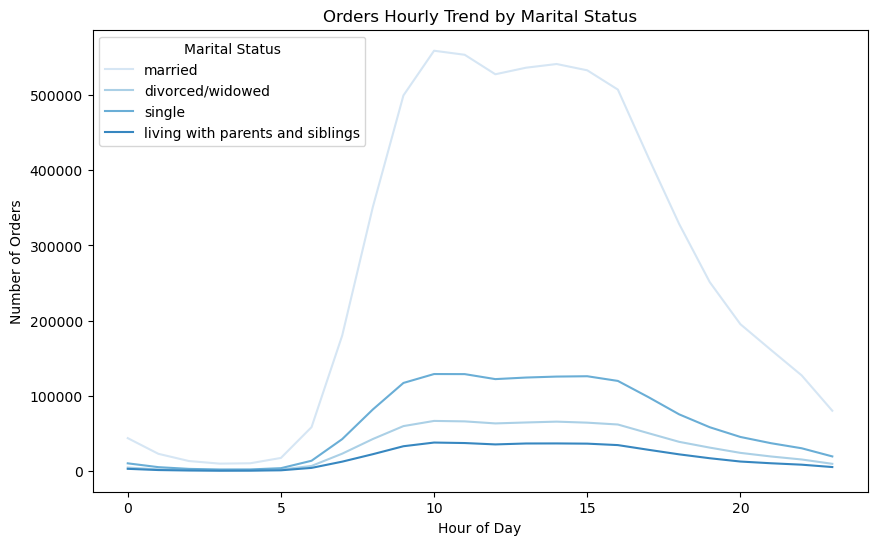

In [19]:
# Define custom color palette
blue_palette = sns.color_palette("Blues", n_colors=5)

# Plotting
line_marital_order = plt.figure(figsize=(10, 6))

for i, marital_status in enumerate(small_final['marital_status'].unique()):
    marital_status_data = small_final[small_final['marital_status'] == marital_status]
    plt.plot(marital_status_data.groupby('orders_time_of_day')['order_number'].count(), 
             label=marital_status, 
             color=blue_palette[i])

# Title and labels
plt.title('Orders Hourly Trend by Marital Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')

# Turn off scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Add legend
plt.legend(title='Marital Status')

# Show the plot
plt.show()

In [20]:
# Save Line Chart

line_marital_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_marital_order.png'))

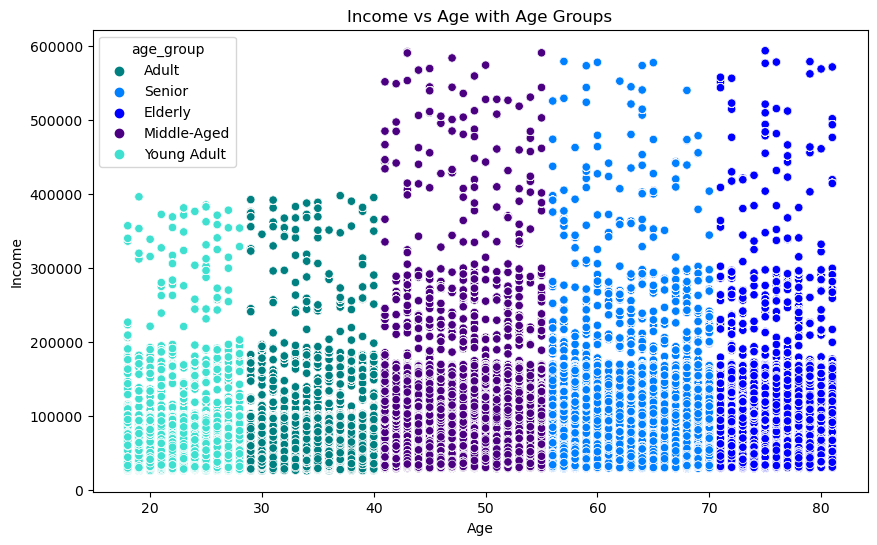

In [21]:
# Define custom color palette
custom_palette = ['#008080', '#007FFF', '#0000FF', '#4B0082', '#40E0D0']
sns.set_palette(custom_palette)

# Plotting
scatter_age_income = plt.figure(figsize=(10, 6))
sns.scatterplot(data=small_final, x='Age', y='income', hue='age_group')

# Title and labels
plt.title('Income vs Age with Age Groups')
plt.xlabel('Age')
plt.ylabel('Income')

# Turn off scientific notation
plt.ticklabel_format(style='plain', axis='both')

# Show the plot
plt.show()

In [22]:
# Save Scatter Plot

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

AttributeError: This method only works with the ScalarFormatter

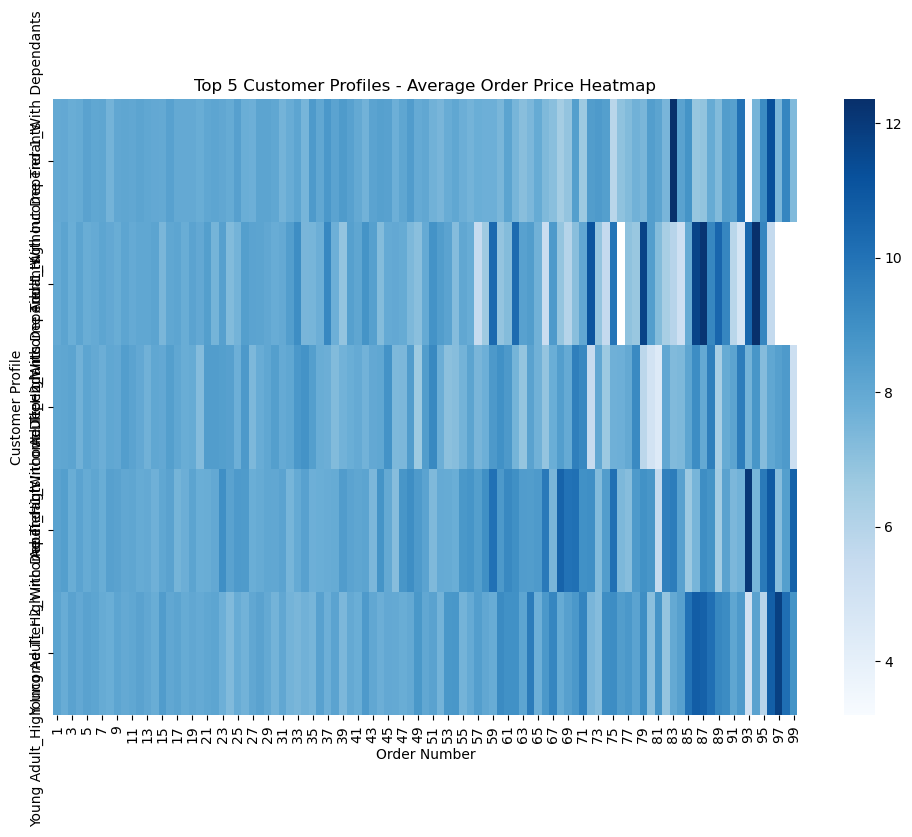

In [41]:
# Calculate the average order price for each customer profile
average_prices = small_final.groupby('customer_profile')['prices'].mean()

# Select the top 5 customer profiles with the highest sum of prices
top_5_profiles = average_prices.nlargest(5)

# Filter the data to include only the top 5 profiles
top_5_data = small_final[small_final['customer_profile'].isin(top_5_profiles.index)]

# Create a pivot table with customer profiles and average order prices
pivot_table = top_5_data.pivot_table(index='customer_profile', columns='order_number', values='prices', aggfunc='mean')

# Plot the heatmap
profile_heat = plt.figure(figsize=(12, 8))  # Increase the size of the figure
sns.heatmap(pivot_table, cmap='Blues')

# Rotate y-axis labels by 90 degrees
plt.yticks(rotation=90)

# Title and labels
plt.title('Top 5 Customer Profiles - Average Order Price Heatmap')
plt.xlabel('Order Number')
plt.ylabel('Customer Profile')

# Turn off scientific notation
plt.ticklabel_format(style='plain', axis='both')

# Show the plot
plt.show()

In [40]:
# Save Heat Map

profile_heat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_heat_order.png'))